# Data Storytelling

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

## Introduction

In this project, I will analyze a dataset of smart phone sensor data to understand how different metrics can be used to identify the physical activity of the user. The goal will be to select those metrics which are good predictors of activity and that could be used in a future machine learning model.

## Load Dataset
First, let's load the feature names from the provided file. This will be used to label the columns in the dataset.

In [2]:
f = open('./data/features.txt', 'r')
features_list = f.readlines()
f.close()

In [3]:
features_list = [x.strip() for x in features_list]

Load the train and test sets. Combine them into one dataset for analysis.

In [4]:
try:
    df_features = pd.read_csv('./data/Train/X_train.txt', header=None, sep=' ', names=features_list)
except ValueError as e:
    print(f'ValueError: {e}')

ValueError: Duplicate names are not allowed.


It looks like some of the feature names are duplicated. Let's see how many and which ones.

In [5]:
unique_feature_count = np.unique(features_list, return_counts=True)
feature_count_zipped = list(zip(unique_feature_count[0], unique_feature_count[1]))

In [6]:
duplicate_features = [x for x in feature_count_zipped if x[1] > 1]

In [7]:
duplicate_features

[('fBodyAcc-Kurtosis-1', 3),
 ('fBodyAcc-Skewness-1', 3),
 ('fBodyAcc-ropy-1', 3),
 ('fBodyAccJerk-Kurtosis-1', 3),
 ('fBodyAccJerk-Skewness-1', 3),
 ('fBodyAccJerk-ropy-1', 3),
 ('fBodyGyro-Kurtosis-1', 3),
 ('fBodyGyro-Skewness-1', 3),
 ('fBodyGyro-ropy-1', 3),
 ('tBodyAcc-ropy-1', 3),
 ('tBodyAccJerk-ropy-1', 3),
 ('tBodyGyro-ropy-1', 3),
 ('tBodyGyroJerk-ropy-1', 3),
 ('tGravityAcc-ropy-1', 3)]

The above features are duplicated, each repeated three times. Let's fix these duplicates by appending a separate integer to each one.

In [8]:
def create_unique_features(features_list):
    unique_feature_count = np.unique(features_list, return_counts=True)
    feature_count_zipped = list(zip(unique_feature_count[0], unique_feature_count[1]))
    duplicate_features = [x[0] for x in feature_count_zipped if x[1] > 1]
    feature_array = np.array(features_list)
    for feature in duplicate_features:
        indices = np.where(feature_array == feature)[0]
        new_values = [f'{feature}_{x}' for x in range(1, len(indices) + 1)]
        feature_array[indices] = new_values
    new_unique_feature_count = np.unique(feature_array, return_counts=True)
    new_feature_count_zipped = list(zip(new_unique_feature_count[0], unique_feature_count[1]))
    new_duplicate_features = [x[0] for x in new_feature_count_zipped if x[1] > 1]
    print(f'The new maximum unique feature count is {np.max(new_unique_feature_count[1])}.')
    return list(feature_array)

In [9]:
updated_features_list = create_unique_features(features_list)

The new maximum unique feature count is 1.


In [10]:
df_features = pd.read_csv('./data/Train/X_train.txt', header=None, sep=' ', names=updated_features_list)

In [11]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7767 entries, 0 to 7766
Columns: 561 entries, tBodyAcc-Mean-1 to tZAxisAcc-AngleWRTGravity-1
dtypes: float64(561)
memory usage: 33.2 MB


Great! Now we have a dataset of features. I will append the labels to these features so we can compare relationships between them.

In [12]:
df_labels = pd.read_csv('./data/Train/y_train.txt', header=None, names=['activity'])

In [13]:
df = pd.concat([df_labels, df_features], axis=1)

In [14]:
df.head()

activity  tBodyAcc-Mean-1  tBodyAcc-Mean-2  tBodyAcc-Mean-3  \
0         5         0.043580        -0.005970        -0.035054   
1         5         0.039480        -0.002131        -0.029067   
2         5         0.039978        -0.005153        -0.022651   
3         5         0.039785        -0.011809        -0.028916   
4         5         0.038758        -0.002289        -0.023863   

   tBodyAcc-STD-1  tBodyAcc-STD-2  tBodyAcc-STD-3  tBodyAcc-Mad-1  \
0       -0.995381       -0.988366       -0.937382       -0.995007   
1       -0.998348       -0.982945       -0.971273       -0.998702   
2       -0.995482       -0.977314       -0.984760       -0.996415   
3       -0.996194       -0.988569       -0.993256       -0.996994   
4       -0.998241       -0.986774       -0.993115       -0.998216   

   tBodyAcc-Mad-2  tBodyAcc-Mad-3  ...  fBodyGyroJerkMag-MeanFreq-1  \
0       -0.988816       -0.953325  ...                    -0.012236   
1       -0.983315       -0.974000  ...                     0.202804   
2       -0.975835       -0.985973  ...                     0.440079   
3       -0.988526       -0.993135  ...                     0.430891   
4       -0.986479       -0.993825  ...                     0.137735   

   fBodyGyroJerkMag-Skewness-1  fBodyGyroJerkMag-Kurtosis-1  \
0                    -0.314848                    -0.713308   
1                    -0.603199                    -0.860677   
2                    -0.404427                    -0.761847   
3                    -0.138373                    -0.491604   
4                    -0.366214                    -0.702490   

   tBodyAcc-AngleWRTGravity-1  tBodyAccJerk-AngleWRTGravity-1  \
0                   -0.112754                        0.030400   
1                    0.053477                       -0.007435   
2                   -0.118559                        0.177899   
3                   -0.036788                       -0.012892   
4                    0.123320                        0.122542   

   tBodyGyro-AngleWRTGravity-1  tBodyGyroJerk-AngleWRTGravity-1  \
0                    -0.464761                        -0.018446   
1                    -0.732626                         0.703511   
2                     0.100699                         0.808529   
3                     0.640011                        -0.485366   
4                     0.693578                        -0.615971   

   tXAxisAcc-AngleWRTGravity-1  tYAxisAcc-AngleWRTGravity-1  \
0                    -0.841559                     0.179913   
1                    -0.845092                     0.180261   
2                    -0.849230                     0.180610   
3                    -0.848947                     0.181907   
4                    -0.848164                     0.185124   

   tZAxisAcc-AngleWRTGravity-1  
0                    -0.051718  
1                    -0.047436  
2                    -0.042271  
3                    -0.040826  
4                    -0.037080  

[5 rows x 562 columns]

The label, `activity` includes integers to designate each type. This isn't very informative. Therefore, let's map these integers to named activities using the file provided with the dataset.

In [15]:
f = open('./data/activity_labels.txt', 'r')
activity_labels = f.readlines()
f.close()

In [16]:
activity_labels =[x.strip() for x in activity_labels]

In [17]:
activity_labels

['1 WALKING',
 '2 WALKING_UPSTAIRS',
 '3 WALKING_DOWNSTAIRS',
 '4 SITTING',
 '5 STANDING',
 '6 LAYING',
 '7 STAND_TO_SIT',
 '8 SIT_TO_STAND',
 '9 SIT_TO_LIE',
 '10 LIE_TO_SIT',
 '11 STAND_TO_LIE',
 '12 LIE_TO_STAND']

In [18]:
activity_map = {int(x.split()[0]):x.split()[1].title() for x in activity_labels}

In [19]:
activity_map

{1: 'Walking',
 2: 'Walking_Upstairs',
 3: 'Walking_Downstairs',
 4: 'Sitting',
 5: 'Standing',
 6: 'Laying',
 7: 'Stand_To_Sit',
 8: 'Sit_To_Stand',
 9: 'Sit_To_Lie',
 10: 'Lie_To_Sit',
 11: 'Stand_To_Lie',
 12: 'Lie_To_Stand'}

In [20]:
df.replace({'activity': activity_map}, inplace=True)

In [21]:
df.iloc[:5, :5]

activity  tBodyAcc-Mean-1  tBodyAcc-Mean-2  tBodyAcc-Mean-3  tBodyAcc-STD-1
0  Standing         0.043580        -0.005970        -0.035054       -0.995381
1  Standing         0.039480        -0.002131        -0.029067       -0.998348
2  Standing         0.039978        -0.005153        -0.022651       -0.995482
3  Standing         0.039785        -0.011809        -0.028916       -0.996194
4  Standing         0.038758        -0.002289        -0.023863       -0.998241

At this point we have a dataset in a format that we can analyze, to look for relationships between variables.

## Analysis
### Recorded Measurements
**Question:** What are the main measurement groups?

In [22]:
columns = df.columns.tolist()

In [23]:
measurement_groups = [x.split('-')[0] for x in columns if x != 'activity']

In [24]:
unique_groups = np.unique(measurement_groups)

In [25]:
print(f'The measurement groups are:\n{unique_groups}.')

The measurement groups are:
['fBodyAcc' 'fBodyAccJerk' 'fBodyAccJerkMag' 'fBodyAccMag' 'fBodyGyro'
 'fBodyGyroJerkMag' 'fBodyGyroMag' 'tBodyAcc' 'tBodyAccJerk'
 'tBodyAccJerkMag' 'tBodyAccMag' 'tBodyGyro' 'tBodyGyroJerk'
 'tBodyGyroJerkMag' 'tBodyGyroMag' 'tGravityAcc' 'tGravityAccMag'
 'tXAxisAcc' 'tYAxisAcc' 'tZAxisAcc'].


**Question:** How many metrics were recorded for each group?

In [26]:
for group in unique_groups:
    num_metrics = len([x for x in columns if f'{group}-' in x])
    print(f' * There are {num_metrics} metrics for measurement group {group}.')

 * There are 79 metrics for measurement group fBodyAcc.
 * There are 79 metrics for measurement group fBodyAccJerk.
 * There are 13 metrics for measurement group fBodyAccJerkMag.
 * There are 13 metrics for measurement group fBodyAccMag.
 * There are 79 metrics for measurement group fBodyGyro.
 * There are 13 metrics for measurement group fBodyGyroJerkMag.
 * There are 13 metrics for measurement group fBodyGyroMag.
 * There are 41 metrics for measurement group tBodyAcc.
 * There are 41 metrics for measurement group tBodyAccJerk.
 * There are 13 metrics for measurement group tBodyAccJerkMag.
 * There are 13 metrics for measurement group tBodyAccMag.
 * There are 41 metrics for measurement group tBodyGyro.
 * There are 41 metrics for measurement group tBodyGyroJerk.
 * There are 13 metrics for measurement group tBodyGyroJerkMag.
 * There are 13 metrics for measurement group tBodyGyroMag.
 * There are 40 metrics for measurement group tGravityAcc.
 * There are 13 metrics for measurement gr

Aside from the last three groups, all groups show a large number of metrics.

In this analysis, I would like to explore how different metrics are related to different activities. In order to address this goal, let's simplify the analysis by concentrating on only one measurement group. In this case, I will use `tBodyAcc`.

In [27]:
t_body_acc_columns = [x for x in columns if 'tBodyAcc-' in x]

In [28]:
t_body_acc_columns

['tBodyAcc-Mean-1',
 'tBodyAcc-Mean-2',
 'tBodyAcc-Mean-3',
 'tBodyAcc-STD-1',
 'tBodyAcc-STD-2',
 'tBodyAcc-STD-3',
 'tBodyAcc-Mad-1',
 'tBodyAcc-Mad-2',
 'tBodyAcc-Mad-3',
 'tBodyAcc-Max-1',
 'tBodyAcc-Max-2',
 'tBodyAcc-Max-3',
 'tBodyAcc-Min-1',
 'tBodyAcc-Min-2',
 'tBodyAcc-Min-3',
 'tBodyAcc-SMA-1',
 'tBodyAcc-Energy-1',
 'tBodyAcc-Energy-2',
 'tBodyAcc-Energy-3',
 'tBodyAcc-IQR-1',
 'tBodyAcc-IQR-2',
 'tBodyAcc-IQR-3',
 'tBodyAcc-ropy-1_1',
 'tBodyAcc-ropy-1_2',
 'tBodyAcc-ropy-1_3',
 'tBodyAcc-ARCoeff-1',
 'tBodyAcc-ARCoeff-2',
 'tBodyAcc-ARCoeff-3',
 'tBodyAcc-ARCoeff-4',
 'tBodyAcc-ARCoeff-5',
 'tBodyAcc-ARCoeff-6',
 'tBodyAcc-ARCoeff-7',
 'tBodyAcc-ARCoeff-8',
 'tBodyAcc-ARCoeff-9',
 'tBodyAcc-ARCoeff-10',
 'tBodyAcc-ARCoeff-11',
 'tBodyAcc-ARCoeff-12',
 'tBodyAcc-Correlation-1',
 'tBodyAcc-Correlation-2',
 'tBodyAcc-Correlation-3',
 'tBodyAcc-AngleWRTGravity-1']

Let's only include columns related to the x, y, and z coordinates. This will give information on the directional movement of the user in a physical space. So, I will exclude the columns containing 'ropy', 'ARCoeff', 'SMA' and 'AngleWRTGravity', which do not contain spatial information.

In [29]:
nonxyz_columns = ['ropy', 'ARCoeff', 'AngleWRTGravity', 'SMA']
for column in nonxyz_columns:
    t_body_acc_columns = [x for x in t_body_acc_columns if column not in x]

The integers 1, 2, 3, do not make it clear which coordinates are x, y, or z. Let's map these integers to their corresponding coordinates so that it is clearer.

In [30]:
coord_map = {
    '1': 'X',
    '2': 'Y',
    '3': 'Z'
}

In [31]:
t_body_acc_columns_split = [x.split('-') for x in t_body_acc_columns]

In [32]:
updated_t_body_acc_columns = ['-'.join([x[0], x[1], coord_map[x[2]]]) for x in t_body_acc_columns_split]

In [33]:
rename_map = {x[0]:x[1] for x in list(zip(t_body_acc_columns, updated_t_body_acc_columns))}

In [34]:
df.rename(columns=rename_map, inplace=True)

## Metric Relationships
The dataset is now in a format where we can compare relationships beween each metric.

First, let's see how many different metrics there are for 'tBodyAcc'.

In [35]:
metrics = [x.split('-')[1] for x in updated_t_body_acc_columns]
unique_metrics = np.unique(metrics).tolist()
print(f'The metrics are: {unique_metrics}')

The metrics are: ['Correlation', 'Energy', 'IQR', 'Mad', 'Max', 'Mean', 'Min', 'STD']


A good way to compare relationships between metrics is using pair plots. Let's create a pairplot for each metric, where we compare relationships between the X, Y, and Z coordinates for that metric. We can color code the points with the activity to get an understanding of how the distribution of points is related to activity.

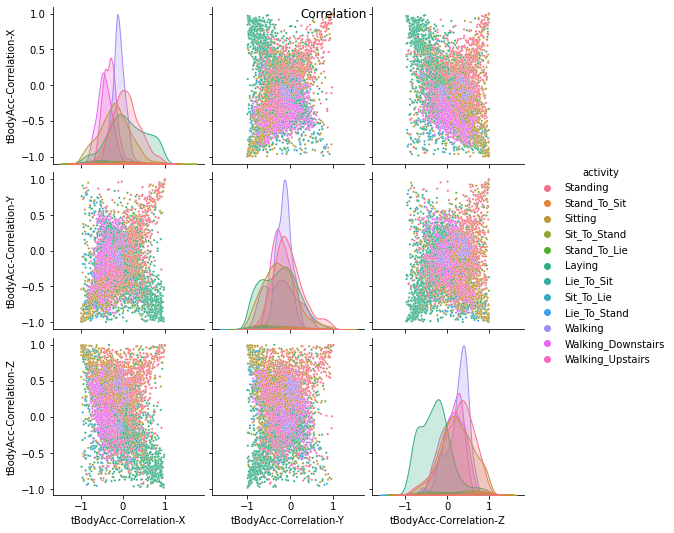

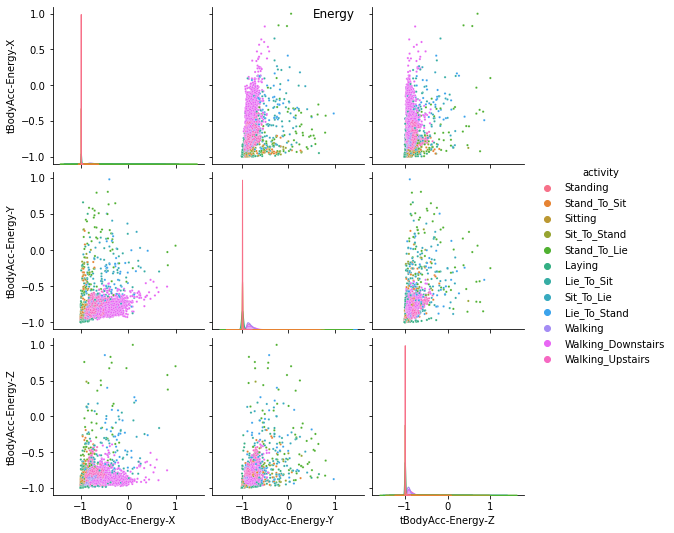

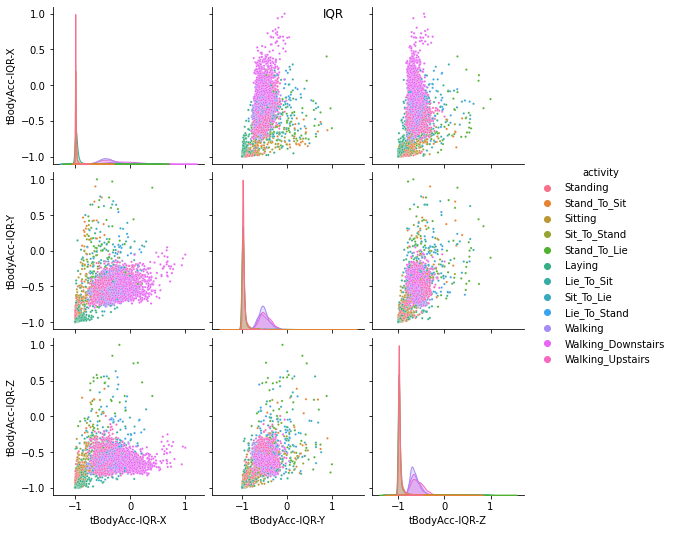

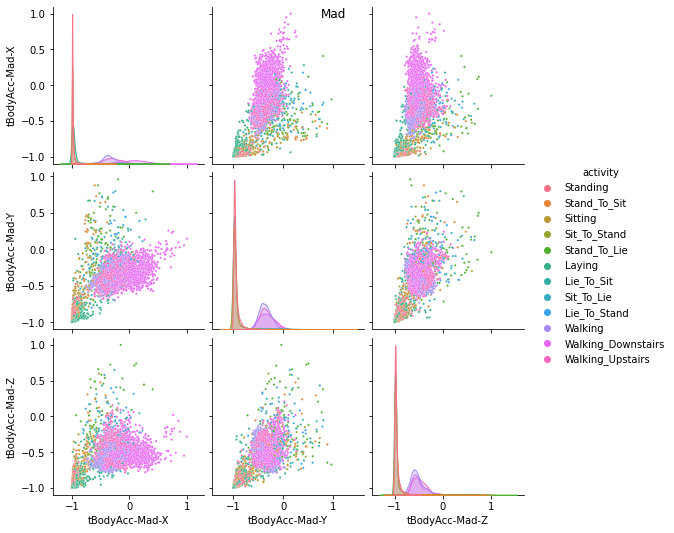

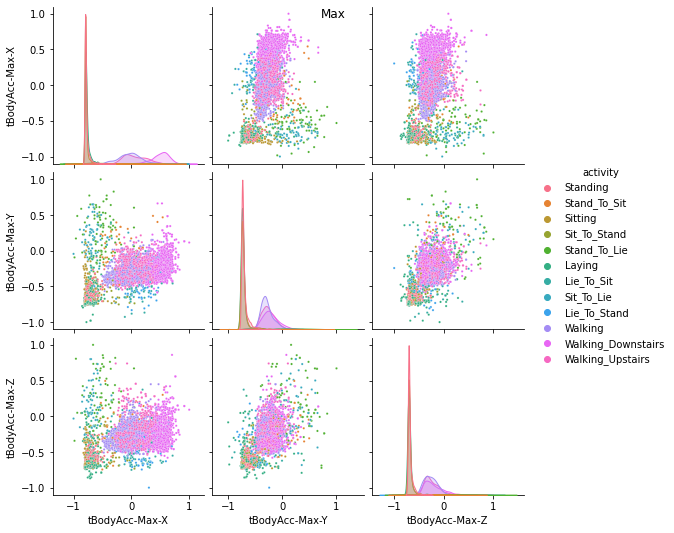

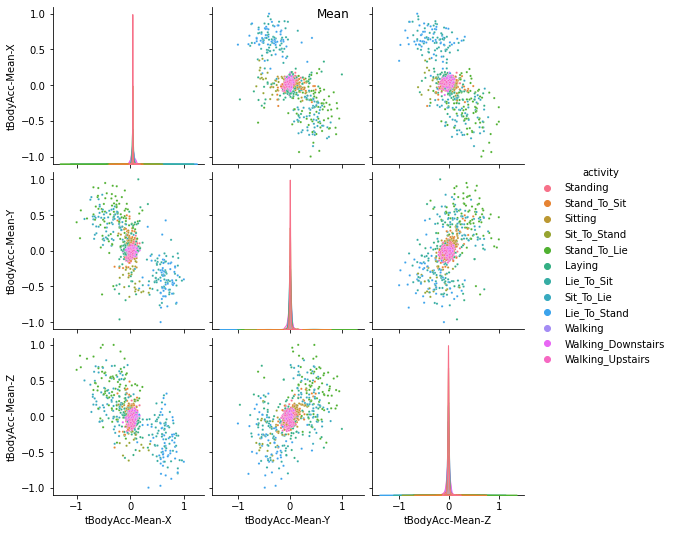

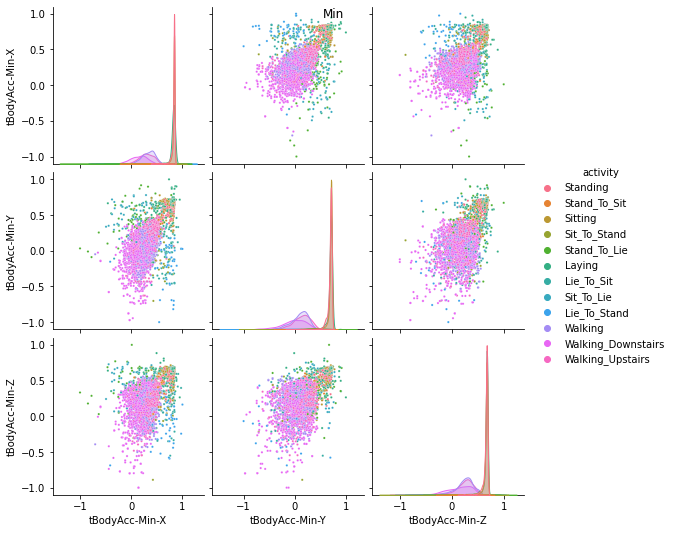

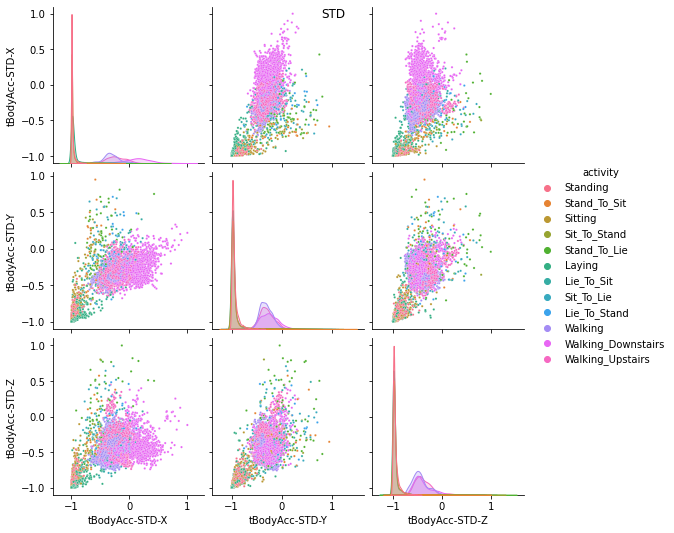

In [36]:
for metric in unique_metrics:
    metric_columns = [x for x in updated_t_body_acc_columns if metric in x]
    metric_columns.append('activity')
    sns.pairplot(df[metric_columns], hue='activity', plot_kws={"s": 5})
    plt.suptitle(f'{metric}')
    plt.show()

There are too many categories. It is hard to see relationships between metrics and activities with so many at once.

To solve this, I will split the categories into three groups and investigate each group separately.

In [37]:
stand_sit = ['Standing', 'Stand_To_Sit', 'Sitting', 'Sit_To_Stand']
lie_sit_stand = ['Stand_To_Lie', 'Laying', 'Lie_To_Sit', 'Sit_To_Lie', 'Lie_To_Stand']
walking = ['Walking', 'Walking_Downstairs', 'Walking_Upstairs']

### Stand-Sit

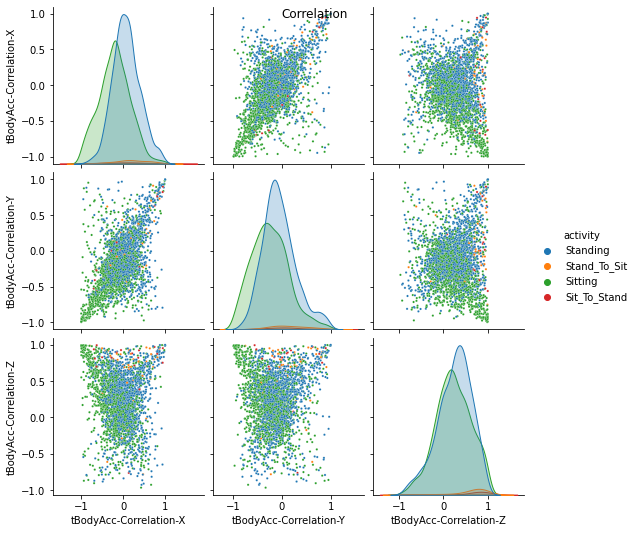

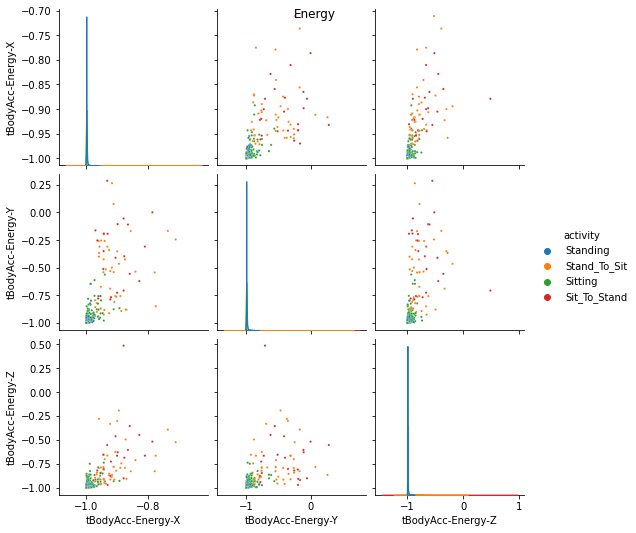

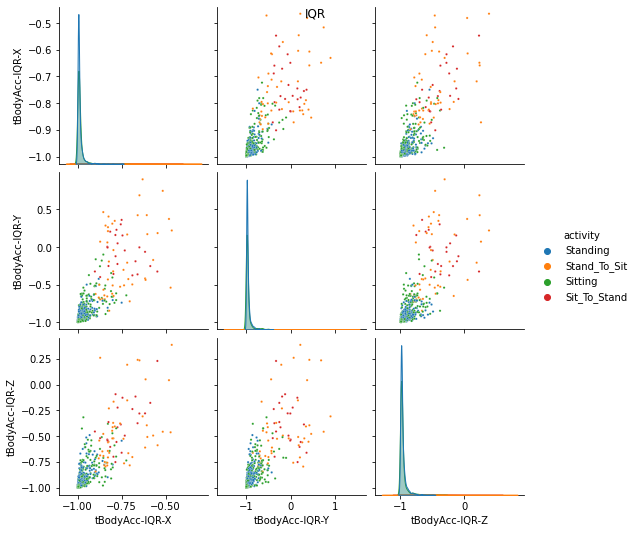

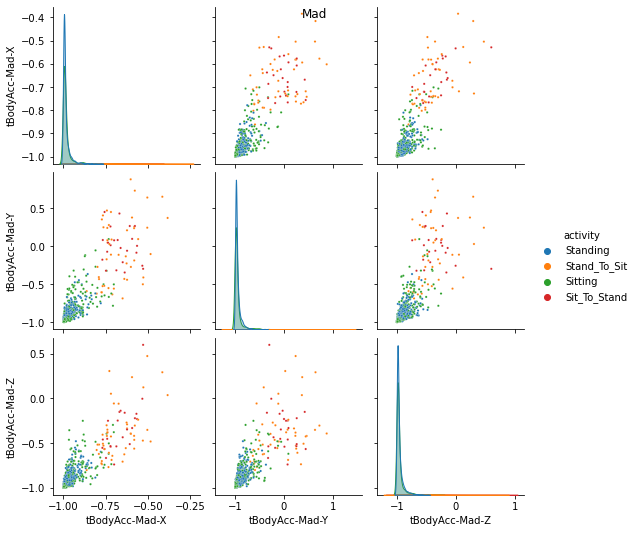

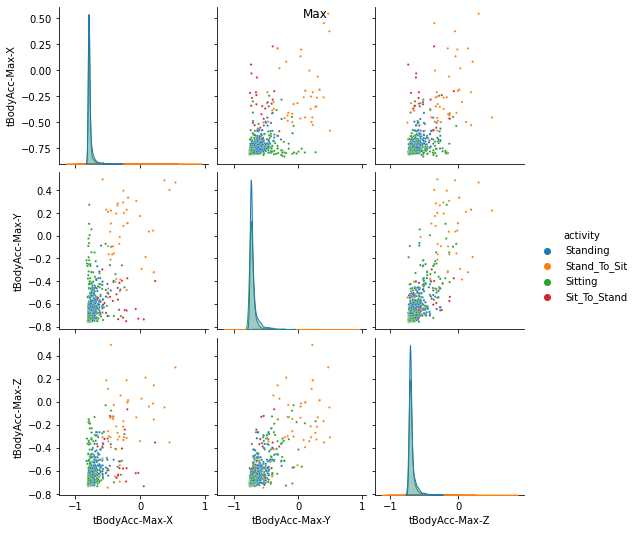

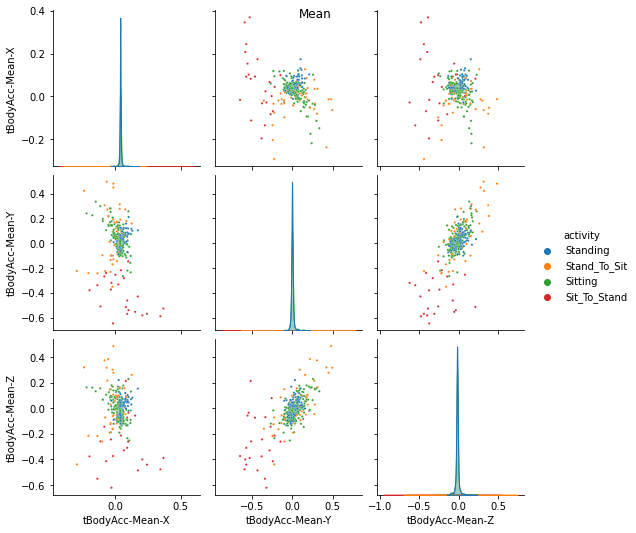

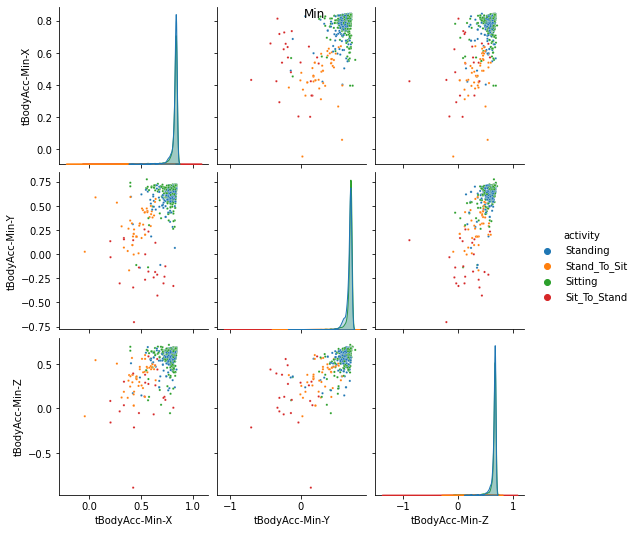

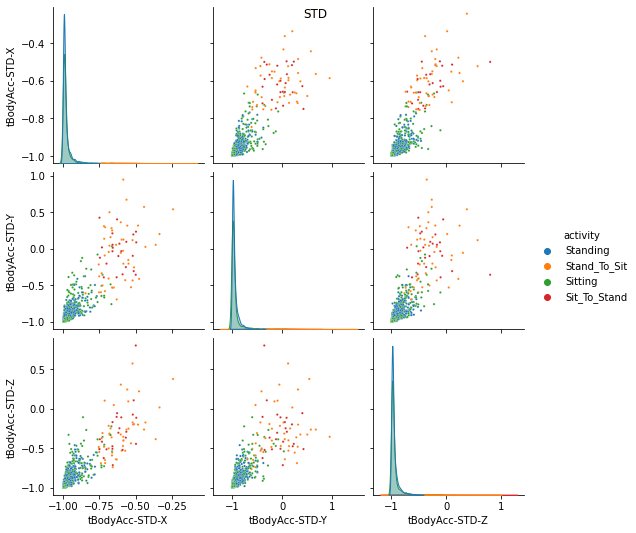

In [38]:
df_subset = df[df['activity'].isin(stand_sit)]
for metric in unique_metrics:
    metric_columns = [x for x in updated_t_body_acc_columns if metric in x]
    metric_columns.append('activity')
    sns.pairplot(df_subset[metric_columns], hue='activity', plot_kws={"s": 5})
    plt.suptitle(f'{metric}')
    plt.show()

**Observations:**
* Correlation
    * No obvious trends.
    * There could be a relationship between the X and Y directions.
* Energy, IQR, MAD, STD
    * All four of these metrics show similiar trends.
    * Standing and Sitting show low values, clustered in the lower left of all plots.
    * Sit_to_Stand and Stand_to_Sit show values that are more spread out, trending to the upper right.
* Mean
    * The values for Standing and Sitting are clustered near the center of each plot.
    * The values for Sit_to_Stand and Stand_to_Sit stradle the mean concentration and appear on either side of the center.
* Min
    * This metric shows the opposite behavior of Max.

### Lie-Sit-Stand:

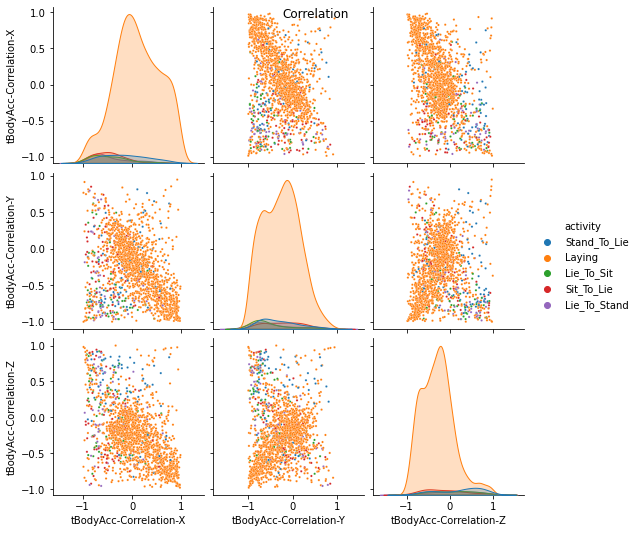

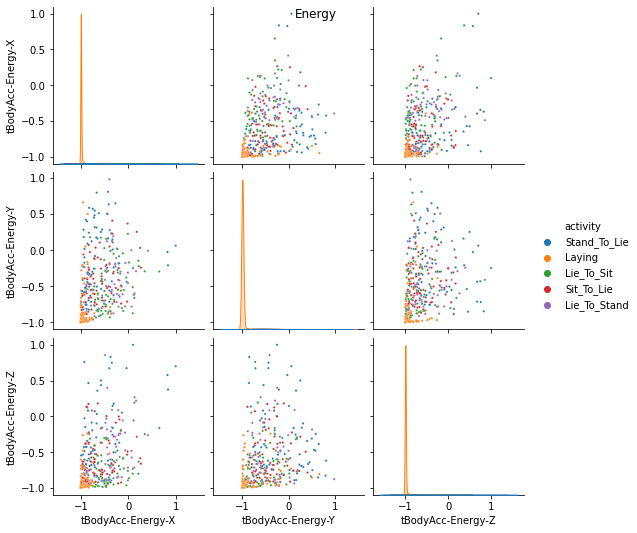

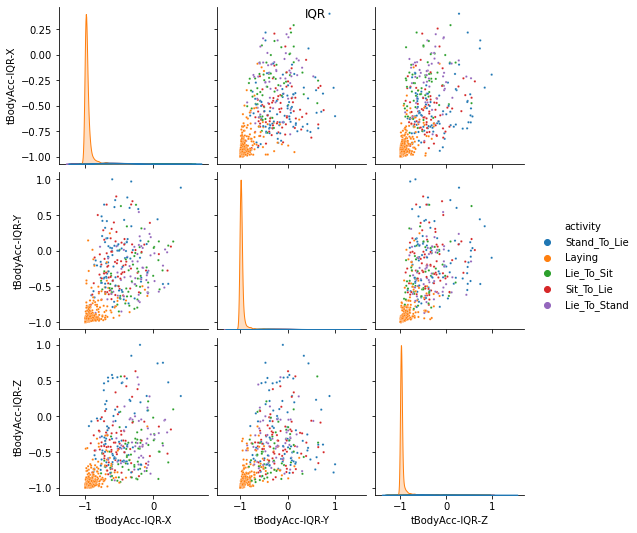

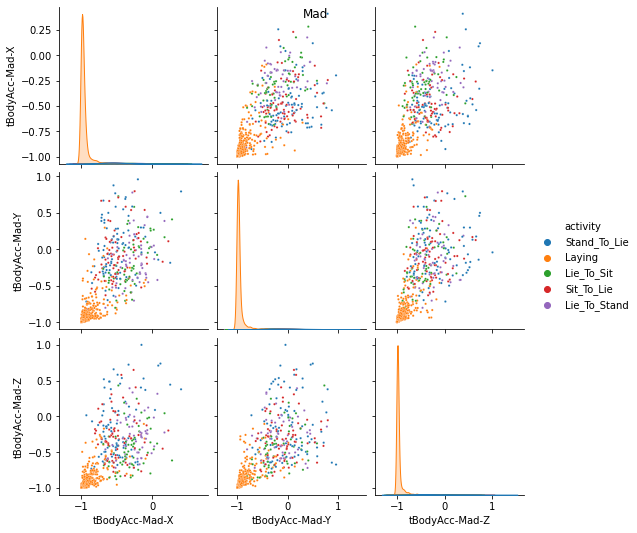

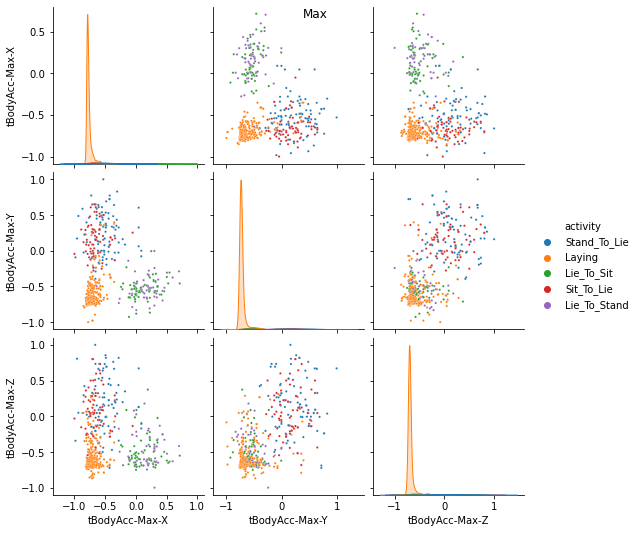

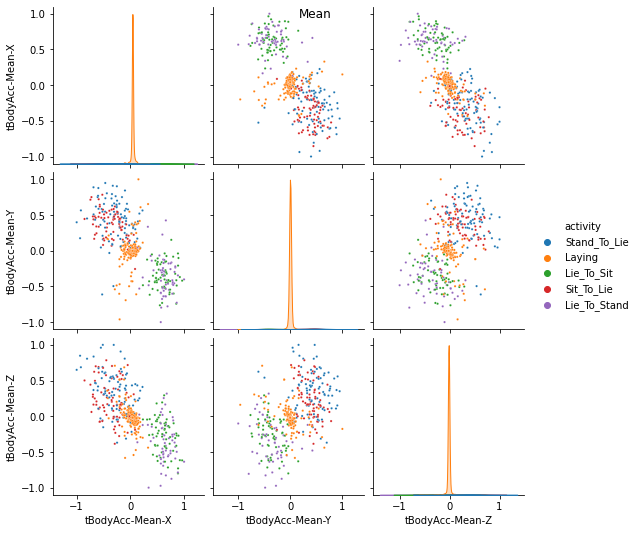

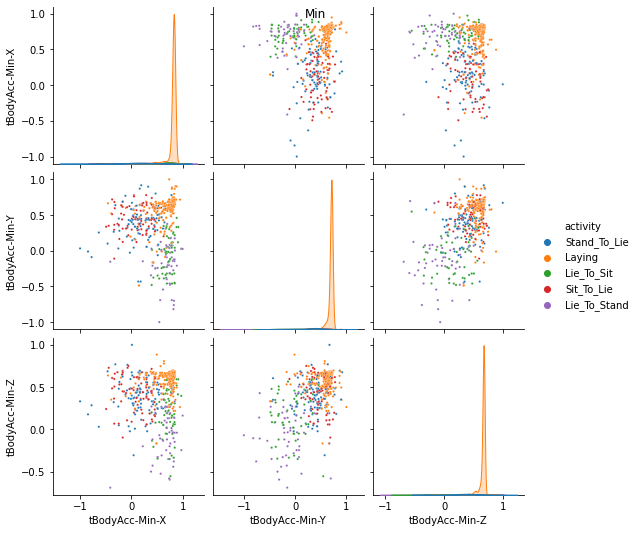

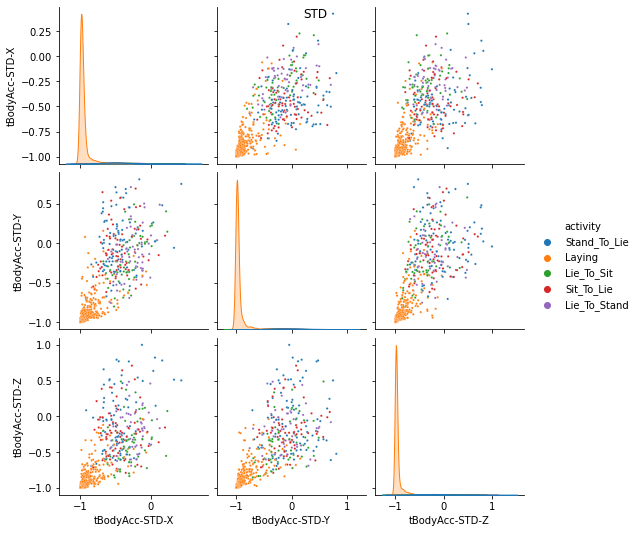

In [39]:
df_subset = df[df['activity'].isin(lie_sit_stand)]
for metric in unique_metrics:
    metric_columns = [x for x in updated_t_body_acc_columns if metric in x]
    metric_columns.append('activity')
    sns.pairplot(df_subset[metric_columns], hue='activity', plot_kws={"s": 5})
    plt.suptitle(f'{metric}')
    plt.show()

* Correlation
    * No obvious trends.
    * There could be a relationship between the X and Y directions for Laying.
* Energy, IQR, MAD, STD
    * All four of these metrics show similiar trends.
    * Laying shows low values, clustered in the lower left of all plots.
    * The other activities show values that are more spread out, trending to the upper right.
* Mean
    * The values for Laying are clustered near the center of each plot.
    * There are two additional clusters for the additional activities. One cluster includes Lie-to-Sit and Lie-to-Stand. The other cluster includes Sit-to-Lie and Stand-to-Lie.
* Max
    * There are three distinct categories when comparing X and Y. One includes Laying, another includes Lie-to-Sit and Lie-to-Stand, and the third includes Sit-to-Lie and Stand-to-Lie.
    * The clustering is not so distinct when comparing X and Y with Z.
* Min
    * This metric shows the opposite behavior of Max.

### Walking:

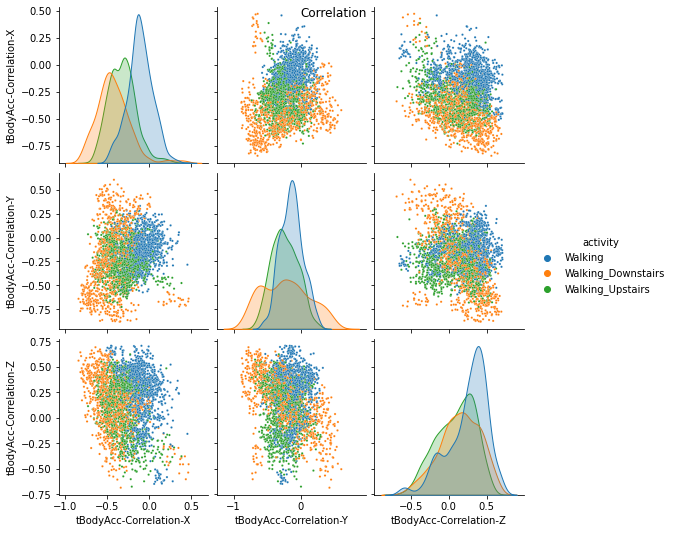

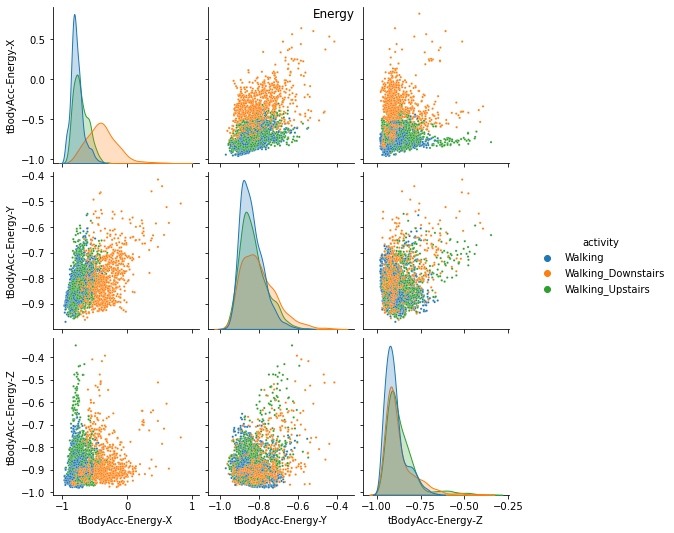

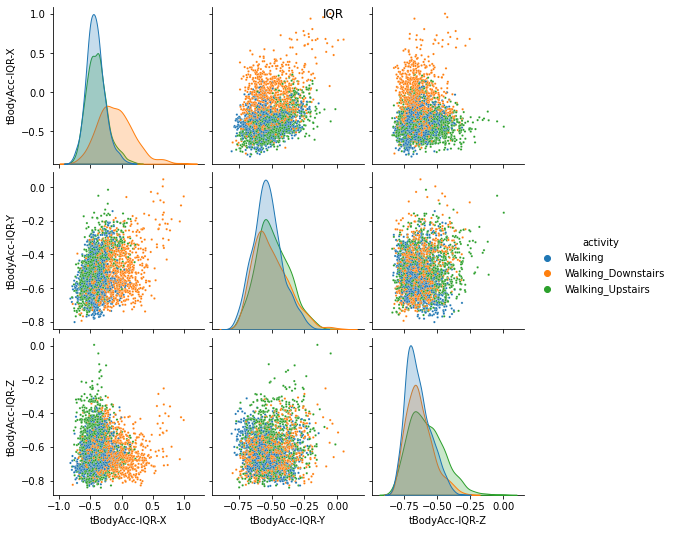

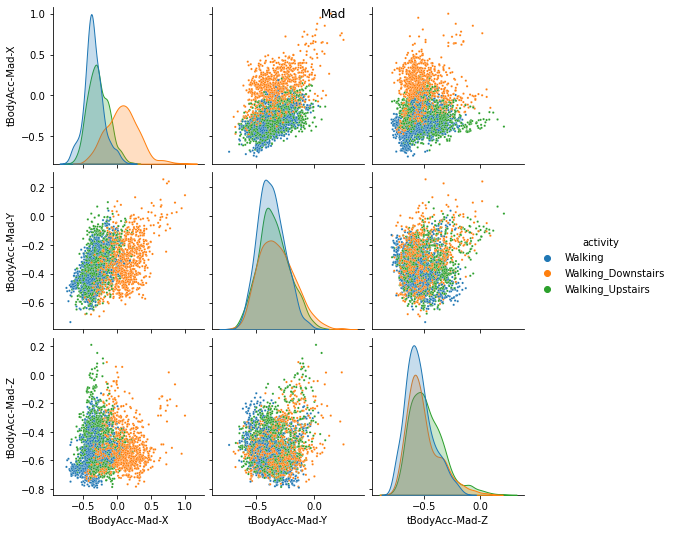

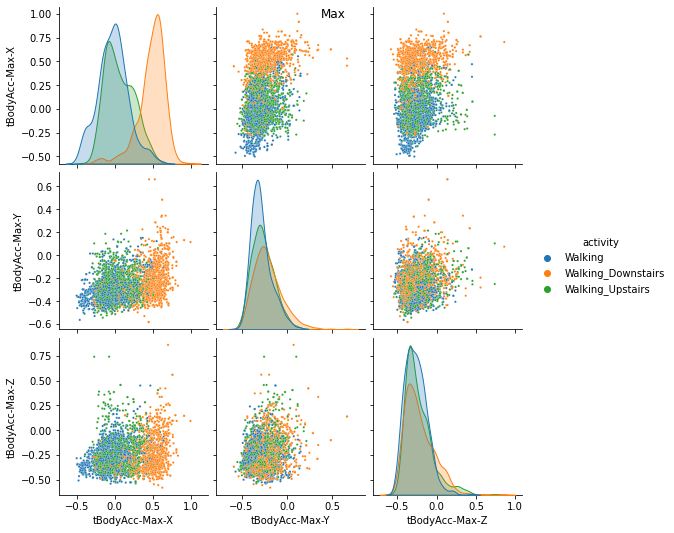

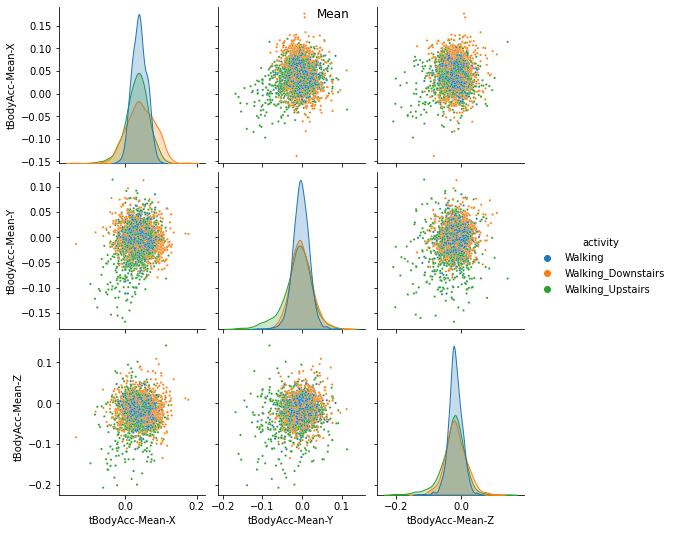

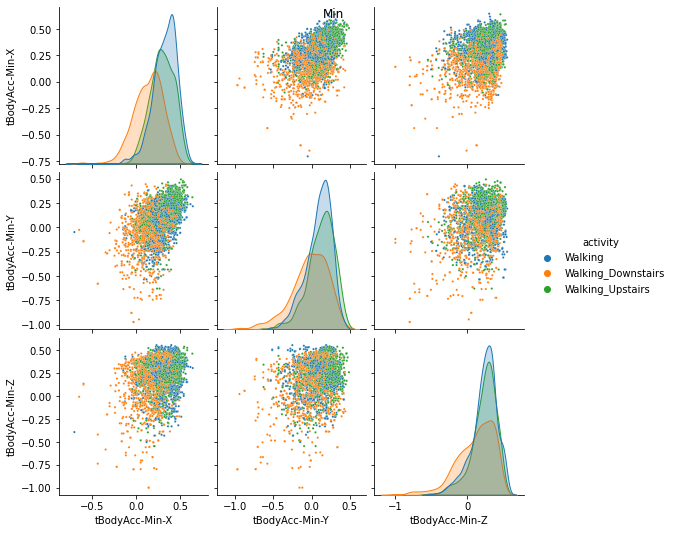

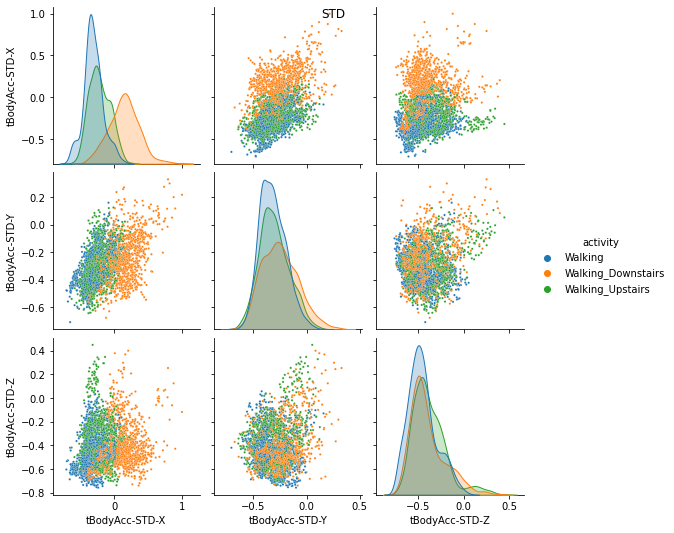

In [40]:
df_subset = df[df['activity'].isin(walking)]
for metric in unique_metrics:
    metric_columns = [x for x in updated_t_body_acc_columns if metric in x]
    metric_columns.append('activity')
    sns.pairplot(df_subset[metric_columns], hue='activity', plot_kws={"s": 5})
    plt.suptitle(f'{metric}')
    plt.show()

**Observations:**
* Correlation, Enery, IQR, Mad, Max, Min, STD
    * Each activity shows three distinct groups, but there is considerable overlap between the groups.
* Mean
    * All activities show the same clustering around the same mean value.
    
## Summary

Let's summarize what we have learned from exploring this dataset. The metrics mean, min, max, and std are good at differentiating changes in position, from sitting or laying positions. None of the metrics provide good ways to differentiate between different types of walking. While this is the case, there could be other sensor measurements that might do a better job.

Now that I have identified some useful metrics, we can start formulating some additional steps that can be performed. Some interesting questions include:
* How is the relationship between each of these metrics, the activity type, and the XYZ coordinates?
* Can combinations of metrics be used to provide more accurate predictions of activity type?
* What type of sensor data is best for differentiating types of walking?

These questions will be explored in the next iteration of this project.